In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78785980/fit-the-data-with-two-type-of-fit-combined-or-any-one-type-fit-whichever-is-goo?noredirect=1#comment138913811_78785980

In [2]:
data = """    distance    force 
    -1.77E-08   3.40E-09
    -1.76E-08   3.40E-09
    -1.75E-08   3.54E-09
    -1.74E-08   5.27E-09
    -1.73E-08   4.81E-09
    -1.72E-08   2.07E-09
    -1.71E-08   1.05E-09
    -1.70E-08   4.62E-10
    -1.69E-08   2.44E-10
    -1.67E-08   1.82E-10
    -1.66E-08   -5.28E-11
    -1.65E-08   -2.64E-10
    -1.64E-08   -3.22E-10
    -1.63E-08   -4.37E-10
    -1.62E-08   -7.34E-10
    -1.61E-08   -9.50E-10
    -1.60E-08   -9.78E-10
    -1.59E-08   -1.02E-09
    -1.58E-08   -1.10E-09
    -1.57E-08   -1.13E-09
    -1.56E-08   -1.21E-09
    -1.55E-08   -1.17E-09
    -1.54E-08   -1.15E-09
    -1.53E-08   -9.42E-10
    -1.52E-08   -6.11E-10
    -1.51E-08   -4.80E-10
    -1.50E-08   -3.50E-10
    -1.49E-08   -3.29E-10
    -1.48E-08   -3.02E-10
    -1.47E-08   -2.56E-10
    -1.46E-08   -2.32E-10
    -1.45E-08   -2.24E-10
    -1.44E-08   -1.78E-10
    -1.43E-08   -1.31E-10
    -1.42E-08   -1.35E-10
    -1.41E-08   -9.99E-11
    -1.40E-08   -4.09E-11
    -1.39E-08   -2.26E-11
    -1.38E-08   -2.88E-11
    -1.36E-08   -3.43E-11
    -1.35E-08   -5.07E-11
    -1.34E-08   -4.52E-11
    -1.33E-08   -3.59E-11
    -1.32E-08   -5.06E-11
    -1.31E-08   -5.36E-11
    -1.30E-08   -3.86E-11
    -1.29E-08   -4.83E-11
    -1.28E-08   -6.97E-11
    -1.27E-08   -4.58E-11
    -1.26E-08   -1.40E-11
    -1.25E-08   -1.74E-11
    -1.24E-08   -4.76E-11
    -1.23E-08   -6.25E-11
    -1.22E-08   -3.08E-11
    -1.21E-08   -1.74E-11
    -1.20E-08   -2.85E-11
    -1.19E-08   -3.00E-11
    -1.18E-08   -3.10E-11
    -1.17E-08   -2.50E-11
    -1.16E-08   -3.61E-11
    -1.15E-08   -5.81E-11
    -1.14E-08   -4.96E-11
    -1.13E-08   -3.37E-11
    -1.12E-08   -3.30E-11
    -1.11E-08   -2.93E-11
    -1.10E-08   -3.62E-11
    -1.09E-08   -4.94E-11
    -1.08E-08   -4.43E-11
    -1.06E-08   -3.83E-11
    -1.05E-08   -3.11E-11
    -1.04E-08   -2.48E-11
    -1.03E-08   -3.75E-11
    -1.02E-08   -2.31E-11
    -1.01E-08   -2.24E-11
    -1.00E-08   -4.04E-11
    -9.92E-09   -2.70E-11
    -9.82E-09   -1.43E-11
    -9.72E-09   -9.88E-12
    -9.61E-09   -1.54E-11
    -9.51E-09   -1.96E-11
    -9.41E-09   -2.28E-11
    -9.30E-09   -3.71E-11
    -9.20E-09   -4.11E-11
    -9.10E-09   -1.74E-11
    -8.99E-09   9.00E-12
    -8.89E-09   1.02E-12
    -8.78E-09   -2.85E-11
    -8.68E-09   -1.83E-11
    -8.58E-09   -1.25E-12
    -8.47E-09   -1.47E-11
    -8.37E-09   -3.09E-11
    -8.27E-09   -3.52E-11
    -8.16E-09   -3.08E-11
    -8.06E-09   -3.14E-11
    -7.96E-09   -4.07E-11
    -7.85E-09   -4.25E-11
    -7.75E-09   -4.19E-11
    -7.65E-09   -2.50E-11
    -7.54E-09   -1.22E-11
    -7.44E-09   3.36E-12
    -7.34E-09   7.60E-12
    -7.23E-09   -1.82E-11
    -7.13E-09   -3.02E-11
    -7.03E-09   -3.79E-11
    -6.92E-09   -3.27E-11
    -6.82E-09   -3.25E-11
    -6.72E-09   -1.24E-11
    -6.61E-09   -1.16E-11
    -6.51E-09   -4.27E-11
    -6.41E-09   -2.73E-11
    -6.30E-09   -1.81E-11
    -6.20E-09   -2.86E-11
    -6.10E-09   -2.55E-11
    -5.99E-09   -3.75E-11
    -5.89E-09   -4.72E-11
    -5.78E-09   -8.01E-12
    -5.68E-09   2.63E-11
    -5.58E-09   1.73E-12
    -5.47E-09   -3.50E-11
    -5.37E-09   -4.88E-11
    -5.27E-09   -4.08E-11
    -5.16E-09   -1.41E-11
    -5.06E-09   5.05E-12
    -4.96E-09   1.13E-11
    -4.85E-09   1.43E-12
    -4.75E-09   -2.32E-11
    -4.65E-09   -3.38E-11
    -4.54E-09   -1.38E-11
    -4.44E-09   9.58E-12
    -4.34E-09   1.52E-12
    -4.23E-09   -1.99E-11
    -4.13E-09   -3.96E-11
    -4.03E-09   -4.08E-11
    -3.92E-09   -3.01E-11
    -3.82E-09   -1.87E-11
    -3.72E-09   -5.81E-12
    -3.61E-09   3.56E-12
    -3.51E-09   -7.76E-12
    -3.41E-09   -4.15E-11
    -3.30E-09   -6.75E-11
    -3.20E-09   -6.22E-11
    -3.10E-09   -3.56E-11
    -2.99E-09   -1.90E-11
    -2.89E-09   -1.76E-11
    -2.78E-09   -7.10E-12
    -2.68E-09   1.25E-11
    -2.58E-09   8.13E-12
    -2.47E-09   -8.95E-12
    -2.37E-09   -1.52E-11
    -2.27E-09   -1.48E-11
    -2.16E-09   -1.17E-11
    -2.06E-09   -2.28E-11
    -1.96E-09   -4.26E-11
    -1.85E-09   -5.58E-11
    -1.75E-09   -4.82E-11
    -1.65E-09   -3.35E-11
    -1.54E-09   -1.04E-11
    -1.44E-09   5.28E-13
    -1.34E-09   -1.03E-11
    -1.23E-09   -1.22E-11
    -1.13E-09   1.52E-12
    -1.03E-09   -4.77E-12
    -9.23E-10   -3.37E-11
    -8.19E-10   -1.84E-11
    -7.16E-10   -8.62E-12
    -6.13E-10   -2.80E-11
    -5.09E-10   -2.48E-11
    -4.06E-10   -3.99E-12
    -3.02E-10   -7.42E-13
    -1.99E-10   -1.86E-11
    -9.54E-11   -1.71E-11
    8.06E-12    1.53E-11
    1.12E-10    1.91E-11
    2.15E-10    -2.75E-12
    3.18E-10    -7.53E-12
    4.22E-10    -1.34E-12
    5.25E-10    -2.12E-11
    6.29E-10    -3.89E-11
    7.32E-10    -2.37E-11
    8.36E-10    -2.73E-11
    9.39E-10    -3.20E-11
    1.04E-09    -1.56E-11
    1.15E-09    -9.17E-12
    1.25E-09    -1.38E-12
    1.35E-09    6.78E-12
    1.46E-09    -4.55E-12
    1.56E-09    -1.69E-11
    1.66E-09    -2.19E-11
    1.77E-09    -1.42E-11
    1.87E-09    -2.43E-11
    1.97E-09    -4.14E-11
    2.08E-09    -4.16E-11
    2.18E-09    -4.71E-11
    2.28E-09    -4.83E-11
    2.39E-09    -2.39E-11
    2.49E-09    -2.05E-12
    2.59E-09    -2.21E-12
    2.70E-09    -2.18E-12
    2.80E-09    -1.16E-11
    2.90E-09    -1.97E-11
    3.01E-09    -3.44E-11
    3.11E-09    -6.25E-11
    3.21E-09    -5.27E-11
    3.32E-09    -2.01E-11
    3.42E-09    -1.33E-11
    3.53E-09    -3.15E-12
    3.63E-09    1.46E-11
    3.73E-09    1.82E-11
    3.84E-09    -2.36E-12
    3.94E-09    -2.48E-11
    4.04E-09    -3.09E-11
    4.15E-09    -3.72E-11
    4.25E-09    -2.81E-11
    4.35E-09    -2.56E-11
    4.46E-09    -4.30E-11
    4.56E-09    -6.31E-12
    4.66E-09    2.11E-11
    4.77E-09    -4.34E-12
    4.87E-09    -9.74E-12
    4.97E-09    -8.47E-12
    5.08E-09    -8.08E-12
    5.18E-09    -4.18E-12
    5.28E-09    -6.95E-12
    5.39E-09    -6.77E-12
    5.49E-09    -6.60E-14
    5.59E-09    -2.30E-11
    5.70E-09    -4.33E-11
    5.80E-09    -4.12E-11
    5.90E-09    -4.53E-11
    6.01E-09    -4.75E-11
    6.11E-09    -4.15E-11
    6.21E-09    -2.59E-11
    6.32E-09    -1.65E-11
    6.42E-09    -2.12E-11
    6.53E-09    -1.48E-11
    6.63E-09    3.70E-12
    6.73E-09    1.29E-11
    6.84E-09    6.49E-13
    6.94E-09    -2.16E-11
    7.04E-09    -3.00E-11
    7.15E-09    -1.33E-11
    7.25E-09    2.78E-12
    7.35E-09    -4.47E-13
    7.46E-09    -7.96E-12
    7.56E-09    -5.61E-12
    7.66E-09    -1.29E-12
    7.77E-09    -5.08E-12
    7.87E-09    -1.21E-11
    7.97E-09    -1.63E-11
    8.08E-09    -2.33E-11
    8.18E-09    -3.40E-11
    8.28E-09    -1.35E-11
    8.39E-09    1.73E-11
    8.49E-09    2.65E-11
    8.59E-09    1.85E-11
    8.70E-09    -6.51E-12
    8.80E-09    -2.92E-11
    8.90E-09    -3.74E-11
    9.01E-09    -3.62E-11
    9.11E-09    -2.00E-11
    9.21E-09    -1.22E-12
    9.32E-09    6.68E-12
    9.42E-09    -1.60E-12
    9.52E-09    -1.27E-11
    9.63E-09    -1.28E-11
    9.73E-09    -1.64E-11
    9.84E-09    -2.32E-11
    9.94E-09    1.41E-12
    1.00E-08    1.03E-11
    1.01E-08    -2.61E-11
    1.02E-08    -3.74E-11
    1.04E-08    -2.98E-11
    1.05E-08    -4.38E-11
    1.06E-08    -5.11E-11
    1.07E-08    -3.31E-11
    1.08E-08    -1.49E-11
    1.09E-08    1.62E-11
    1.10E-08    1.87E-11
    1.11E-08    -4.80E-12
    1.12E-08    -6.11E-12
    1.13E-08    -1.79E-11
    1.14E-08    -4.61E-11
    1.15E-08    -4.14E-11
    1.16E-08    -2.12E-11
    1.17E-08    -1.47E-11
    1.18E-08    7.30E-12
    1.19E-08    1.94E-11
    1.20E-08    3.81E-12
    1.21E-08    -1.05E-11
    1.22E-08    -3.00E-12
    1.23E-08    -4.68E-12
    1.24E-08    -1.91E-11
    1.25E-08    -2.18E-11
    1.26E-08    -2.93E-11
    1.27E-08    -3.88E-11
    1.28E-08    -2.89E-11
    1.29E-08    -1.79E-12
    1.30E-08    -9.21E-12
    1.31E-08    -4.13E-11
    1.32E-08    -3.83E-11
    1.34E-08    7.81E-14
    1.35E-08    2.32E-11
    1.36E-08    1.91E-11
    1.37E-08    -1.41E-11
    1.38E-08    -4.52E-11
    1.39E-08    -4.29E-11
    1.40E-08    -1.96E-11
    1.41E-08    1.87E-12
    1.42E-08    -2.42E-12
    1.43E-08    -3.57E-12
    1.44E-08    7.99E-12
    1.45E-08    1.07E-11
    1.46E-08    1.46E-12
    1.47E-08    1.09E-12
    1.48E-08    -3.67E-12
    1.49E-08    -2.01E-11
    1.50E-08    -2.71E-11
    1.51E-08    -1.40E-11
    1.52E-08    -4.58E-12
    1.53E-08    -9.81E-12
    1.54E-08    -9.87E-12
    1.55E-08    -1.00E-11
    1.56E-08    2.84E-13
    1.57E-08    -4.53E-12
    1.58E-08    -2.27E-11
    1.59E-08    -2.34E-11
    1.60E-08    -6.68E-12
    1.61E-08    1.49E-11
    1.62E-08    1.96E-11
    1.64E-08    1.25E-11
    1.65E-08    -1.75E-11
    1.66E-08    -4.14E-11
    1.67E-08    -4.08E-11
    1.68E-08    -2.94E-11
    1.69E-08    -1.51E-11
    1.70E-08    -3.19E-12
    1.71E-08    1.06E-11
    1.72E-08    2.12E-11
    1.73E-08    1.87E-11
    1.74E-08    8.40E-12
    1.75E-08    -8.24E-12
    1.76E-08    -2.34E-11
    1.77E-08    -1.61E-11
    1.78E-08    7.20E-12
    1.79E-08    -1.10E-11
    1.80E-08    -4.80E-11
    1.81E-08    -4.89E-11
    1.82E-08    -2.80E-11
    1.83E-08    -1.12E-11
    1.84E-08    -6.21E-12
    1.85E-08    -1.20E-12
    1.86E-08    -1.62E-11
    1.87E-08    -2.54E-11
    1.88E-08    -1.08E-11
    1.89E-08    -1.80E-11
    1.90E-08    -1.72E-11
    1.91E-08    -1.18E-12
    1.92E-08    6.22E-12
    1.94E-08    1.54E-11
    1.95E-08    4.97E-12
    1.96E-08    -2.88E-11
    1.97E-08    -3.05E-11
    1.98E-08    -1.86E-11
    1.99E-08    -3.75E-11
    2.00E-08    -2.38E-11
    2.01E-08    6.23E-12
    2.02E-08    -6.22E-13
    2.03E-08    -1.75E-11
    2.04E-08    -2.90E-11
    2.05E-08    -1.05E-11
    2.06E-08    5.35E-12
    2.07E-08    -1.20E-11
    2.08E-08    -5.85E-12
    2.09E-08    -2.46E-12
    2.10E-08    -8.25E-12
    2.11E-08    -5.34E-12
    2.12E-08    -1.01E-11
    2.13E-08    -1.50E-11
    2.14E-08    -2.69E-11
    2.15E-08    -4.15E-11
    2.16E-08    -2.90E-11
    2.17E-08    -2.49E-11
    2.18E-08    -3.58E-11
    2.19E-08    -2.03E-11
    2.20E-08    1.35E-11
    2.21E-08    1.69E-11
    2.22E-08    -1.81E-11
    2.24E-08    -4.05E-11
    2.25E-08    -2.05E-11
    2.26E-08    -8.54E-12
    2.27E-08    -1.48E-11
    2.28E-08    -4.88E-13
    2.29E-08    8.96E-12
    2.30E-08    9.94E-12
    2.31E-08    3.10E-13
    2.32E-08    -1.61E-11
    2.33E-08    -2.69E-11
    2.34E-08    -3.18E-11
    2.35E-08    -2.66E-11
    2.36E-08    -2.38E-11
    2.37E-08    -2.72E-11
    2.38E-08    -4.06E-12
    2.39E-08    5.26E-12
    2.40E-08    -2.21E-11
    2.41E-08    -1.49E-11
    2.42E-08    1.46E-11
    2.43E-08    1.11E-11
    2.44E-08    2.84E-12
    2.45E-08    1.24E-11
    2.46E-08    -7.15E-12
    2.47E-08    -4.86E-11
    2.48E-08    -4.72E-11
    2.49E-08    -2.43E-12
    2.50E-08    3.82E-11
    2.51E-08    2.77E-11
    2.52E-08    -6.25E-12
    2.54E-08    -1.79E-11
    2.55E-08    -3.61E-11
    2.56E-08    -5.52E-11
    2.57E-08    -1.51E-11
    2.58E-08    2.69E-11
    2.59E-08    2.58E-11
    2.60E-08    1.48E-11
    2.61E-08    -1.56E-11
    2.62E-08    -3.23E-11
    2.63E-08    -3.06E-11
    2.64E-08    -1.79E-11
    2.65E-08    4.83E-12
    2.66E-08    1.33E-11
    2.67E-08    1.52E-11
    2.68E-08    1.82E-11
    2.69E-08    6.90E-12
    2.70E-08    -2.51E-12
    2.71E-08    2.50E-12
    2.72E-08    -2.29E-11
    2.73E-08    -4.13E-11
    2.74E-08    -6.23E-12
    2.75E-08    1.65E-11
    2.76E-08    -3.06E-12
    2.77E-08    -3.29E-11
    2.78E-08    -2.95E-11
    2.79E-08    -9.03E-12
    2.80E-08    -6.71E-12
    2.81E-08    -7.09E-12
    2.82E-08    -9.39E-12
    2.84E-08    -1.40E-11
    2.85E-08    -9.45E-12
    2.86E-08    5.33E-12
    2.87E-08    1.01E-11
    2.88E-08    -7.60E-12
    2.89E-08    -2.69E-11
    2.90E-08    -2.05E-11
    2.91E-08    -7.23E-13
    2.92E-08    1.88E-11
    2.93E-08    1.75E-11
    2.94E-08    -1.39E-11
    2.95E-08    -3.52E-11
    2.96E-08    -2.50E-11
    2.97E-08    1.07E-11
    2.98E-08    8.93E-12
    2.99E-08    -1.91E-11
    3.00E-08    -1.71E-11
    3.01E-08    -1.17E-11
    3.02E-08    -5.79E-12
    3.03E-08    -2.08E-12
    3.04E-08    -1.33E-11
    3.05E-08    -2.22E-11
    3.06E-08    -2.02E-11
    3.07E-08    -2.14E-11
    3.08E-08    -2.41E-11
    3.09E-08    -1.95E-11
    3.10E-08    6.25E-12
    3.11E-08    2.11E-11
    3.12E-08    7.65E-12
    3.14E-08    -8.28E-12
    3.15E-08    -2.01E-11
    3.16E-08    -1.25E-11
    3.17E-08    3.62E-12
    3.18E-08    -9.12E-12
    3.19E-08    -1.79E-11
    3.20E-08    -8.35E-12
    3.21E-08    -9.35E-12
    3.22E-08    -8.50E-12
    3.23E-08    -3.26E-12
    3.24E-08    -1.07E-11
    3.25E-08    -1.32E-11
    3.26E-08    -9.42E-12
    3.27E-08    -1.13E-11
    3.28E-08    -2.52E-11
    3.29E-08    -4.17E-11
    3.30E-08    -1.87E-11
    3.31E-08    6.60E-12
    3.32E-08    -2.80E-13
    3.33E-08    7.08E-13
    3.34E-08    7.62E-12
    3.35E-08    2.31E-12
    3.36E-08    -6.07E-12
    3.37E-08    -2.43E-11
    3.38E-08    -1.49E-11
    3.39E-08    -8.58E-13
    3.40E-08    -1.60E-11
    3.41E-08    -2.04E-11
    3.42E-08    -1.12E-11
    3.44E-08    -6.96E-12
    3.45E-08    -4.08E-12
    3.46E-08    -5.40E-12
    3.47E-08    -8.05E-12
    3.48E-08    -6.10E-12
    3.49E-08    -1.63E-11
    3.50E-08    -2.99E-11
    3.51E-08    -4.52E-11
    3.52E-08    -3.63E-11
    3.53E-08    1.07E-11
    3.54E-08    2.01E-11
    3.55E-08    -1.96E-12
    3.56E-08    -5.51E-12
    3.57E-08    -5.06E-13
    3.58E-08    7.47E-12
    3.59E-08    1.24E-11
    3.60E-08    4.63E-12
    3.61E-08    -8.83E-12
    3.62E-08    -1.21E-11
    3.63E-08    -1.02E-11
    3.64E-08    -1.17E-11
    3.65E-08    -1.79E-12
    3.66E-08    5.54E-12
    3.67E-08    1.25E-12
    3.68E-08    -9.99E-12
    3.69E-08    -3.20E-11
    3.70E-08    -3.32E-11
    3.71E-08    -1.23E-11
    3.72E-08    -1.41E-11
    3.74E-08    -1.15E-11
    3.75E-08    8.24E-12
    3.76E-08    -6.69E-12
    3.77E-08    -3.20E-11
    3.78E-08    -1.33E-11
    3.79E-08    2.21E-11
    3.80E-08    3.16E-11
    3.81E-08    -1.39E-12
    3.82E-08    -3.50E-11
    3.83E-08    -1.23E-11
    3.84E-08    7.52E-12
    3.85E-08    -1.44E-12
    3.86E-08    -7.22E-12
    3.87E-08    -2.46E-12
    3.88E-08    -6.43E-12
    3.89E-08    -2.17E-11
    3.90E-08    -2.15E-11
    3.91E-08    -3.56E-12
    3.92E-08    1.73E-11
    3.93E-08    2.80E-11
    3.94E-08    1.85E-11
    3.95E-08    -6.95E-12
    3.96E-08    -2.89E-11
    3.97E-08    -2.89E-11
    3.98E-08    1.82E-12
    3.99E-08    3.65E-11
    4.00E-08    2.87E-11
    4.01E-08    1.03E-11
    4.02E-08    1.69E-12
    4.04E-08    -1.25E-11
    4.05E-08    -1.52E-11
    4.06E-08    -1.33E-11
    4.07E-08    3.90E-12
    4.08E-08    6.83E-12
    4.09E-08    -1.43E-11
    4.10E-08    -2.58E-11
    4.11E-08    -2.63E-11
    4.12E-08    -3.44E-13
    4.13E-08    3.21E-11
    4.14E-08    2.04E-11
    4.15E-08    -8.35E-12
    4.16E-08    -1.14E-11
    4.17E-08    -4.94E-12
    4.18E-08    2.18E-14
    4.19E-08    -9.23E-12
    4.20E-08    -2.60E-11
    4.21E-08    -6.08E-11
    4.22E-08    -5.02E-11
    4.23E-08    8.58E-13
    4.24E-08    1.44E-11
    4.25E-08    8.04E-12
    4.26E-08    4.00E-12
    4.27E-08    2.88E-12
    4.28E-08    -1.24E-12
    4.29E-08    -3.44E-12
    4.30E-08    -1.42E-11
    4.31E-08    -1.07E-11
    4.32E-08    -1.14E-11
    4.34E-08    -1.76E-11
    4.35E-08    -8.60E-12
    4.36E-08    -6.77E-12
    4.37E-08    -4.62E-12
    4.38E-08    -4.86E-13
    4.39E-08    9.45E-12
    4.40E-08    1.82E-11
    4.41E-08    1.12E-11
    4.42E-08    -5.32E-12
    4.43E-08    -1.70E-11
    4.44E-08    -1.72E-11
    4.45E-08    -1.93E-11
    4.46E-08    -1.74E-11
    4.47E-08    -6.17E-12
    4.48E-08    -1.03E-12
    4.49E-08    -6.10E-13
    4.50E-08    -1.22E-11
    4.51E-08    -1.97E-11
    4.52E-08    -4.65E-12
    4.53E-08    6.46E-12
    4.54E-08    1.09E-11
    4.55E-08    2.04E-11
    4.56E-08    7.34E-12
    4.57E-08    -1.38E-11
    4.58E-08    -2.19E-12
    4.59E-08    1.55E-12
    4.60E-08    -1.16E-11
    4.61E-08    -1.33E-11
    4.62E-08    -1.63E-11
    4.64E-08    -1.57E-11
    4.65E-08    -5.91E-12
    4.66E-08    -1.03E-11
    4.67E-08    -2.33E-11
    4.68E-08    -2.89E-12
    4.69E-08    2.85E-11
    4.70E-08    1.76E-11
    4.71E-08    -2.48E-11
    4.72E-08    -3.63E-11
    4.73E-08    -4.27E-12
    4.74E-08    -1.76E-13
    4.75E-08    -1.43E-11
    4.76E-08    -4.78E-12
    4.77E-08    9.21E-12
    4.78E-08    1.37E-11
    4.79E-08    1.34E-11
    4.80E-08    -2.21E-12
    4.81E-08    -6.08E-12
    4.82E-08    3.71E-12
    4.83E-08    -9.30E-12
    4.84E-08    -1.33E-11
    4.85E-08    6.49E-12
    4.86E-08    1.62E-11
    4.87E-08    1.55E-11
    4.88E-08    4.04E-12
    4.89E-08    -2.08E-11
    4.90E-08    -2.91E-11
    4.91E-08    -1.47E-11
    4.92E-08    -1.82E-12
    4.94E-08    -2.56E-12
    4.95E-08    -2.03E-11
    4.96E-08    -3.82E-11
    4.97E-08    -1.20E-11
    4.98E-08    1.05E-11
    4.99E-08    -9.13E-12
    5.00E-08    -7.73E-12
    5.01E-08    -1.22E-11
    5.02E-08    -2.44E-11
    5.03E-08    -1.19E-11
    5.04E-08    -5.94E-12
    5.05E-08    2.73E-12
    5.06E-08    2.59E-11
    5.07E-08    1.19E-11
    5.08E-08    -2.35E-11
    5.09E-08    -3.56E-11
    5.10E-08    -4.46E-11
    5.11E-08    -3.06E-11
    5.12E-08    1.84E-11
    5.13E-08    4.66E-11
    5.14E-08    1.68E-11
    5.15E-08    -2.04E-11
    5.16E-08    -3.23E-11
    5.17E-08    -3.17E-11
    5.18E-08    -1.54E-11
    5.19E-08    7.71E-12
    5.20E-08    2.30E-11
    5.21E-08    1.64E-11
    5.22E-08    -4.91E-13
    5.24E-08    -2.29E-11
    5.25E-08    -1.78E-11
    5.26E-08    -3.33E-13
    5.27E-08    -1.28E-11
    5.28E-08    -2.30E-11
    5.29E-08    -7.40E-12
    5.30E-08    1.14E-11
    5.31E-08    9.05E-12
    5.32E-08    8.96E-12
    5.33E-08    1.40E-11
    5.34E-08    -1.40E-11
    5.35E-08    -4.92E-11
    5.36E-08    -3.75E-11
    5.37E-08    -1.77E-11
    5.38E-08    1.65E-12
    5.39E-08    2.45E-11
    5.40E-08    2.89E-11
    5.41E-08    1.77E-11
    5.42E-08    -6.71E-13
    5.43E-08    -1.22E-11
    5.44E-08    -2.03E-11
    5.45E-08    -2.08E-11
    5.46E-08    -9.35E-12
    5.47E-08    -4.77E-12
    5.48E-08    -7.50E-12
    5.49E-08    8.17E-13
    5.50E-08    1.46E-11
    5.51E-08    1.31E-11
    5.52E-08    -3.66E-13
    5.54E-08    -1.08E-11
    5.55E-08    -8.47E-12
    5.56E-08    -3.84E-12
    5.57E-08    -1.17E-12
    5.58E-08    4.88E-12
    5.59E-08    2.59E-11
    5.60E-08    8.57E-12
    5.61E-08    -2.47E-11
    5.62E-08    -2.35E-11
    5.63E-08    -2.09E-11
    5.64E-08    -1.26E-11
    5.65E-08    -2.20E-12
    5.66E-08    -1.23E-11
    5.67E-08    -2.38E-11
    5.68E-08    -1.09E-11
    5.69E-08    -8.27E-12
    5.70E-08    -1.30E-11
    5.71E-08    1.19E-12
    5.72E-08    1.45E-11
    5.73E-08    1.07E-11
    5.74E-08    -1.14E-11
    5.75E-08    -2.30E-11
    5.76E-08    4.44E-12
    5.77E-08    2.63E-11
    5.78E-08    -3.94E-12
    5.79E-08    -3.63E-11
    5.80E-08    -3.06E-11
    5.81E-08    -1.93E-11
    5.82E-08    1.17E-11
    5.84E-08    1.98E-11
    5.85E-08    -1.33E-11
    5.86E-08    -1.51E-11
    5.87E-08    -5.56E-13
    5.88E-08    -3.31E-12
    5.89E-08    -4.85E-12
    5.90E-08    1.62E-11
    5.91E-08    3.19E-11
    5.92E-08    1.89E-11
    5.93E-08    -4.85E-12
    5.94E-08    -2.19E-11
    5.95E-08    -6.70E-12
    5.96E-08    1.14E-11
    5.97E-08    2.02E-12
    5.98E-08    1.40E-11
    5.99E-08    3.04E-11
    6.00E-08    1.43E-11
    6.01E-08    -5.74E-12
    6.02E-08    -1.15E-11
    6.03E-08    -1.22E-11
    6.04E-08    -1.79E-11
    6.05E-08    -1.81E-11
    6.06E-08    -9.81E-12
    6.07E-08    -6.86E-12
    6.08E-08    -7.75E-12
    6.09E-08    -1.48E-11
    6.10E-08    -1.11E-11
    6.11E-08    4.77E-12
    6.12E-08    4.37E-12
    6.14E-08    -1.32E-11
    6.15E-08    -1.82E-11
    6.16E-08    -4.21E-13
    6.17E-08    -2.63E-12
    6.18E-08    -2.29E-11
    6.19E-08    -2.88E-12
    6.20E-08    1.69E-11
    6.21E-08    -5.91E-13
    6.22E-08    -1.94E-11
    6.23E-08    -2.97E-11
    6.24E-08    3.54E-13
    6.25E-08    3.54E-11
    6.26E-08    3.27E-12
    6.27E-08    -2.18E-11
    6.28E-08    -1.40E-11
    6.29E-08    -2.73E-11
    6.30E-08    -4.26E-11
    6.31E-08    -1.81E-11
    6.32E-08    1.79E-11
    6.33E-08    1.25E-11
    6.34E-08    1.17E-13
    6.35E-08    -1.18E-12
    6.36E-08    1.51E-11
    6.37E-08    2.45E-11
    6.38E-08    1.41E-11
    6.39E-08    -2.22E-12
    6.40E-08    -1.69E-11
    6.41E-08    -2.22E-13
    6.42E-08    3.71E-12
    6.44E-08    -5.58E-12
    6.45E-08    3.99E-12
    6.46E-08    2.34E-11
    6.47E-08    1.45E-11
    6.48E-08    -1.44E-11
    6.49E-08    -2.24E-11
    6.50E-08    -2.17E-11
    6.51E-08    -2.07E-11
    6.52E-08    -1.45E-11
    6.53E-08    -3.36E-12
    6.54E-08    -1.30E-11
    6.55E-08    -2.50E-11
    6.56E-08    -9.35E-12
    6.57E-08    -8.18E-12
    6.58E-08    -1.38E-11
    6.59E-08    -1.68E-12
    6.60E-08    3.18E-11
    6.61E-08    7.05E-11
    6.62E-08    1.51E-11
    6.63E-08    -3.42E-11
    6.64E-08    -3.53E-12
    6.65E-08    3.27E-12
    6.66E-08    -1.60E-11
    6.67E-08    -2.28E-11
    6.68E-08    -1.30E-11
    6.69E-08    -1.61E-12
    6.70E-08    1.08E-11
    6.71E-08    2.27E-11
    6.72E-08    2.53E-11
    6.74E-08    1.86E-11
    6.75E-08    -5.11E-12
    6.76E-08    -2.58E-11
    6.77E-08    -3.24E-11
    6.78E-08    -3.05E-11
    6.79E-08    -1.17E-11
    6.80E-08    -2.24E-11
    6.81E-08    -2.59E-11
    6.82E-08    -7.59E-12
    6.83E-08    -2.43E-11
    6.84E-08    -3.38E-11
    6.85E-08    -2.73E-11
    6.86E-08    -2.28E-12
    6.87E-08    2.75E-11
    6.88E-08    2.37E-11
    6.89E-08    -8.20E-12
    6.90E-08    -2.54E-11
    6.91E-08    -9.12E-12
    6.92E-08    5.32E-12
    6.93E-08    1.25E-11
    6.94E-08    1.52E-11
    6.95E-08    4.42E-12
    6.96E-08    2.43E-12
    6.97E-08    1.68E-11
    6.98E-08    -1.04E-12
    6.99E-08    -3.03E-11
    7.00E-08    -1.78E-11
    7.01E-08    6.65E-12
    7.02E-08    -9.43E-12
    7.04E-08    -2.26E-11
    7.05E-08    -1.14E-11
    7.06E-08    -8.41E-12
    7.07E-08    1.46E-12
    7.08E-08    1.79E-11
    7.09E-08    2.30E-11
    7.10E-08    1.63E-11
    7.11E-08    1.01E-11
    7.12E-08    8.77E-12
    7.13E-08    1.04E-11
    7.14E-08    1.25E-11
    7.15E-08    6.57E-12
    7.16E-08    3.02E-12
    7.17E-08    6.22E-12
    7.18E-08    -4.24E-13
    7.19E-08    -7.26E-12
    7.20E-08    -3.01E-12
    7.21E-08    7.25E-12
    7.22E-08    3.23E-12
    7.23E-08    -6.42E-12
    7.24E-08    -5.01E-12
    7.25E-08    -7.07E-12
    7.26E-08    1.66E-12
    7.27E-08    7.47E-12
    7.28E-08    2.08E-12
    7.29E-08    -4.36E-12
    7.30E-08    -5.33E-12
    7.31E-08    -1.27E-11
    7.32E-08    -2.40E-11
    7.33E-08    -1.40E-11
    7.35E-08    -4.41E-12
    7.36E-08    1.87E-11
    7.37E-08    2.04E-11
    7.38E-08    -9.53E-12
    7.39E-08    -7.32E-12
    7.40E-08    1.56E-11
    7.41E-08    3.00E-11
    7.42E-08    7.86E-12
    7.43E-08    -9.26E-12
    7.44E-08    -2.85E-12
    7.45E-08    -9.55E-12
    7.46E-08    -1.76E-11
    7.47E-08    -2.26E-11
    7.48E-08    -1.26E-11
    7.49E-08    6.33E-12
    7.50E-08    -8.56E-12
    7.51E-08    -3.35E-11
    7.52E-08    4.17E-13
    7.53E-08    1.82E-11
    7.54E-08    -8.64E-12
    7.55E-08    -1.63E-11
    7.56E-08    -1.71E-11
    7.57E-08    -1.39E-11
    7.58E-08    5.31E-12
    7.59E-08    1.29E-11
    7.60E-08    8.80E-12
    7.61E-08    8.24E-12
    7.62E-08    -3.81E-12
    7.63E-08    -4.79E-12
    7.65E-08    3.76E-12
    7.66E-08    -1.27E-11
    7.67E-08    -2.37E-11
    7.68E-08    -9.57E-12
    7.69E-08    -5.87E-12
    7.70E-08    -5.71E-12
    7.71E-08    5.08E-14
    7.72E-08    1.49E-11
    7.73E-08    9.27E-12
    7.74E-08    -1.29E-11
    7.75E-08    4.68E-12
    7.76E-08    1.66E-11
    7.77E-08    7.51E-12
    7.78E-08    1.66E-11
    7.79E-08    1.74E-11
    7.80E-08    -1.85E-11
    7.81E-08    -4.34E-11
    7.82E-08    -2.88E-11
    7.83E-08    -1.89E-13
    7.84E-08    2.13E-11
    7.85E-08    1.57E-11
    7.86E-08    4.41E-12
    7.87E-08    3.12E-13
    7.88E-08    -8.49E-12
    7.89E-08    -1.04E-11
    7.90E-08    -1.26E-11
    7.91E-08    -1.02E-11
    7.92E-08    3.67E-12
    7.93E-08    1.18E-11
    7.95E-08    8.41E-12
    7.96E-08    1.10E-11
    7.97E-08    2.69E-11
    7.98E-08    3.26E-11
    7.99E-08    1.80E-11
    8.00E-08    -9.04E-12
    8.01E-08    -3.25E-11
    8.02E-08    -3.51E-11
    8.03E-08    -3.00E-11
    8.04E-08    -3.35E-11
    8.05E-08    -1.32E-11
    8.06E-08    1.13E-11
    8.07E-08    2.46E-11
    8.08E-08    2.14E-11
    8.09E-08    6.44E-12
    8.10E-08    4.17E-12
    8.11E-08    6.20E-12
    8.12E-08    8.81E-14
    8.13E-08    -6.71E-12
    8.14E-08    -3.96E-12
    8.15E-08    -1.47E-11
    8.16E-08    -2.47E-11
    8.17E-08    -1.13E-11
    8.18E-08    9.52E-14
    8.19E-08    -1.37E-11
    8.20E-08    -4.01E-11
    8.21E-08    -3.38E-11
    8.22E-08    -3.44E-12
    8.23E-08    1.71E-11
    8.25E-08    2.31E-11
    8.26E-08    2.10E-11
    8.27E-08    2.19E-11
    8.28E-08    7.37E-12
    8.29E-08    -1.34E-11
    8.30E-08    -1.28E-11
    8.31E-08    -4.69E-12
    8.32E-08    -1.33E-11
    8.33E-08    -1.60E-11
    8.34E-08    -1.06E-11
    8.35E-08    -1.17E-11
    8.36E-08    -1.24E-11
"""

In [3]:
import io
data = pd.read_fwf(io.StringIO(data))

In [4]:
data.shape

(980, 2)

In [5]:
#q = data["distance"].between(-1.71e-8, -0.0e-8)
data = data.iloc[4:-850, :]

In [6]:
def model(x, D, a, x0):
    return D * (np.exp(- 2 * a * (x - x0)) - np.exp(- a * (x - x0))) ** 2

In [7]:
#data["distance"] -= data["distance"].min()
data["distance"] *= 1e9
data["force"] *= 1e9

In [8]:
data

,distance,force
4,-17.30,4.81000
5,-17.20,2.07000
6,-17.10,1.05000
7,-17.00,0.46200
8,-16.90,0.24400
...,...,...
125,-4.75,-0.02320
126,-4.65,-0.03380
127,-4.54,-0.01380
128,-4.44,0.00958


In [9]:
popt, pcov = optimize.curve_fit(
    model, data["distance"], data["force"],
    p0=[1, 1, -1],
    bounds=[
        (0., 0., -np.inf),
        (np.inf, np.inf, np.inf)
    ]
)
popt, pcov

(array([ 1.09944147e-04,  1.90250592e+00, -1.58782627e+01]),
 array([[ 1.05361895e-04, -2.02701930e-02, -1.06439240e-01],
        [-2.02701930e-02,  3.96416686e+00,  2.04301729e+01],
        [-1.06439240e-01,  2.04301729e+01,  1.07562348e+02]]))

In [10]:
yhat = model(data["distance"], *popt)

In [11]:
xlin = np.linspace(data["distance"].min(), data["distance"].max(), 200)

In [12]:
ylin = model(xlin, *popt)

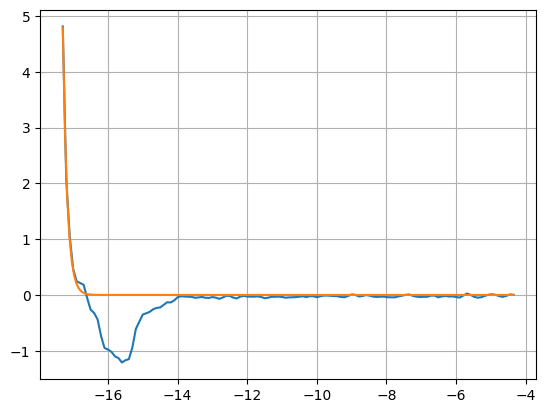

In [13]:
fig, axe = plt.subplots()
axe.plot(data["distance"], data["force"])
axe.plot(xlin, ylin)
axe.grid()